In [2]:
from scipy.optimize import newton
from scipy.special import zeta
import scipy as sp
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import powerlaw as pl
%matplotlib inline

In [30]:
data1=pl.power_law(1.01,1000,100000)
data2=pl.power_law(3.01,1000,100000)
data3=pl.power_law(3.01,1000,100000)
data=np.concatenate((data1,data2),axis=0)

In [38]:
data_fit=pl.Fit_Bayes(data,mixed=1)

In [40]:
#1
data_fit.bic

1352553.0745463986

In [37]:
#2
data_fit.bic

1307346.8788976611

In [32]:
#3
data_fit.bic

1307371.9304412757

(array([  128.,   227.,  1559.,  2243.,  2751.,  1425.,  1287.,   314.,
           49.,    18.]),
 array([ 1.37977281,  1.38065897,  1.38154514,  1.3824313 ,  1.38331746,
         1.38420362,  1.38508978,  1.38597594,  1.3868621 ,  1.38774826,
         1.38863442]),
 <a list of 10 Patch objects>)

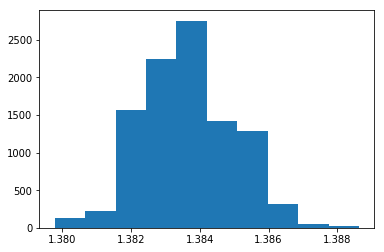

In [39]:
plt.hist((data_fit.samples_gamma)[0])


(array([  604.,  1321.,   659.,  2083.,   233.,  2029.,  1708.,   741.,
          422.,   201.]),
 array([ 2.9091125 ,  2.92238252,  2.93565253,  2.94892255,  2.96219256,
         2.97546258,  2.9887326 ,  3.00200261,  3.01527263,  3.02854264,
         3.04181266]),
 <a list of 10 Patch objects>)

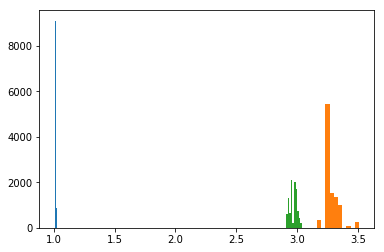

In [33]:
plt.hist((data_fit.samples_gamma)[0])
plt.hist((data_fit.samples_gamma)[1])
plt.hist((data_fit.samples_gamma)[2])

(array([  4.00000000e+00,   2.00000000e+00,   4.40000000e+01,
          2.71000000e+02,   2.94900000e+03,   6.26000000e+02,
          9.13000000e+02,   2.90500000e+03,   9.59000000e+02,
          1.32800000e+03]),
 array([ 0.27901727,  0.30100186,  0.32298646,  0.34497106,  0.36695565,
         0.38894025,  0.41092485,  0.43290944,  0.45489404,  0.47687863,
         0.49886323]),
 <a list of 10 Patch objects>)

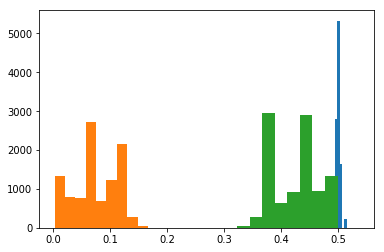

In [34]:
plt.hist((data_fit.samples_weight)[0])
plt.hist((data_fit.samples_weight)[1])
plt.hist((data_fit.samples_weight)[2])

In [ ]:
def Z(gamma, xmin, xmax, discrete=True):
    """
    The normalization function Z for discrete and continuous powerlaw distributions.
    Input: gamma - a randomly sampled target exponent using MCMC algorithm.
    Output: s - normalization value.
    """
    if discrete==True: #when powerlaw is discrete
        if np.isfinite(xmax): #if xmax is NOT infinity:
            #Calculate zeta from Xmin to Infinity and substract Zeta from Xmax to Infinity
            #To find zeta from Xmin to Xmax.
            s=zeta(gamma,xmin)-zeta(gamma,xmax)
        else:
            #if xmax is infinity, simply calculate zeta from Xmin till infinity.
            s=zeta(gamma,xmin)
    else:
        #calculate normalization function when powerlaw is continuous.
        #s=(xmax^(-gamma+1)/(1-gamma))-(xminx^(-gamma+1)/(1-gamma))
        s = (xmax**(-gamma + 1) / (1 - gamma)) - (xmin**(-gamma + 1) / (1 - gamma))
    return s

def Z_prime(gamma,xmin,xmax,discrete=True):
    h = (1e-8)
    s = (Z(gamma + h,xmin,xmax,discrete=True) - Z(gamma - h,xmin,xmax,discrete=True)) / (2 * h)
    return s

def Z_prime2(gamma,xmin,xmax,discrete=True):
    h = (1e-8)
    s = (Z(gamma + 2*h,xmin,xmax,discrete=True) - 2*Z(gamma,xmin,xmax,discrete=True) + Z(gamma - 2*h,xmin,xmax,discrete=True)) / (4*(h**2))
    return s

def Z_jeffrey(gamma,xmin,xmax,discrete=True):
    z=np.sqrt((Z_prime2(gamma,xmin,xmax,discrete=True))/Z(gamma,xmin,xmax,discrete=True)-Z_prime(gamma,xmin,xmax,discrete=True)**2/Z(gamma,xmin,xmax,discrete=True)**2)
    return z

In [ ]:
Z_prime2(3,1,1000,discrete=True)

In [ ]:
Z_prime2(3,1,1000,discrete=True)

In [ ]:
Z_prime2(3,1,1000,discrete=True)

In [ ]:
Z_prime(3,1,1000,discrete=True)

In [ ]:
Z_prime(3,1,1000,discrete=True)

In [ ]:
Z_jeffrey(3,1,1000)

In [ ]:
Z0=Z(3,1,1000)
Z1=Z_prime(3,1,1000)
Z2=Z_prime2(3,1,1000)

In [ ]:
Z2

In [ ]:
(-Z1/Z0)**2+Z2/Z0